In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import linregress


# Lab 10

## Part 1A

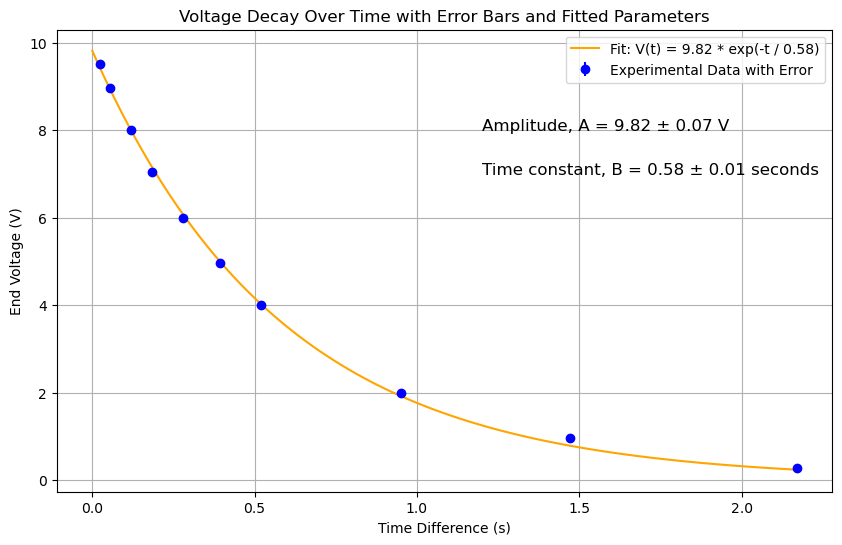

(9.81999987700435, 0.5825068678593872, array([0.06668912, 0.01011174]))

In [8]:
df = pd.read_csv('part1a.csv')

# Convert Time Difference to seconds for fitting
df['Time Difference (s)'] = df['Time Difference (ms)'] / 1000

# Define the discharging model V(t) = A * exp(-t/B)
def discharging_model(t, A, B):
    return A * np.exp(-t / B)

# Fit the data to the discharging model
popt, pcov = curve_fit(discharging_model, df['Time Difference (s)'], df['End Voltage (V)'])
A, B = popt  # Amplitude and time constant

# Calculate the errors from the covariance matrix
errors = np.sqrt(np.diag(pcov))

# Generate theoretical output for plotting
time_values = np.linspace(0, df['Time Difference (s)'].max(), 100)
theoretical_voltage = discharging_model(time_values, A, B)

plt.figure(figsize=(10, 6))
plt.errorbar(df['Time Difference (s)'], df['End Voltage (V)'], yerr=errors[0], fmt='o', label='Experimental Data with Error', color='blue')
plt.plot(time_values, theoretical_voltage, label=f'Fit: V(t) = {A:.2f} * exp(-t / {B:.2f})', color='orange')

# Adding the equations as text annotations on the plot
plt.text(1.2, 8, f'Amplitude, A = {A:.2f} ± {errors[0]:.2f} V', fontsize=12, color='black')
plt.text(1.2, 7, f'Time constant, B = {B:.2f} ± {errors[1]:.2f} seconds', fontsize=12, color='black')

plt.xlabel('Time Difference (s)')
plt.ylabel('End Voltage (V)')
plt.title('Voltage Decay Over Time with Error Bars and Fitted Parameters')
plt.legend()
plt.grid(True)
plt.show()

# Output the fit parameters and their errors
A, B, errors


### Residual Plot Part 1a

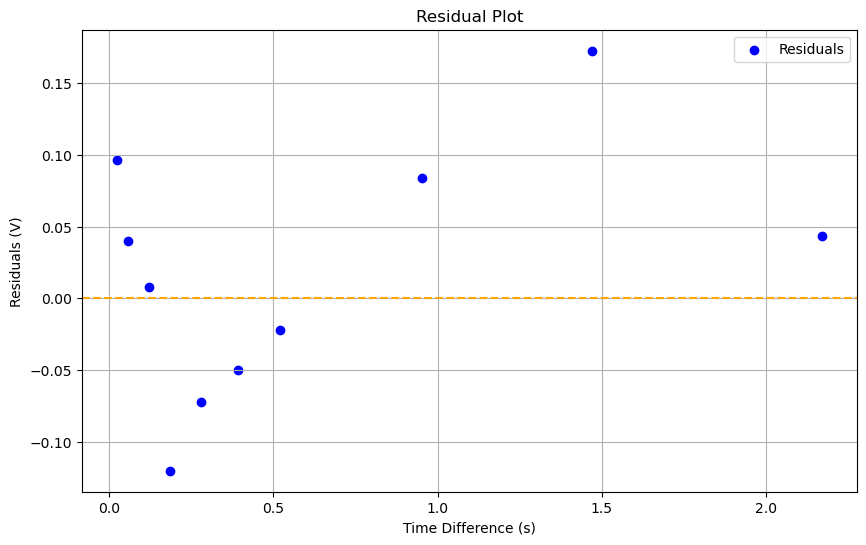

In [10]:
residuals = df['End Voltage (V)'] - discharging_model(df['Time Difference (s)'], A, B)

plt.figure(figsize=(10, 6))
plt.scatter(df['Time Difference (s)'], residuals, color='blue', label='Residuals')
plt.axhline(0, color='orange', linestyle='--')
plt.xlabel('Time Difference (s)')
plt.ylabel('Residuals (V)')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()

# Part 1b

### Equation for Fitting

The discharging voltage $V(t)$ of a capacitor over time in an RC circuit follows an exponential decay:

$V(t) = V_0 e^{-\frac{t}{RC}}$

where:
- $V(t)$ is the voltage at time $t$,
- $V_0$ is the initial voltage,
- $R$ is the resistance,
- $C$ is the capacitance.

### Linearized Form

To fit this data linearly, we take the natural logarithm of both sides:

$\ln(V(t)) = \ln(V_0) - \frac{t}{RC}$

This can be rearranged into the linear form:

$\ln(V(t)) = -\frac{1}{RC} \cdot t + \ln(V_0)$

where:
- $\ln(V(t))$ corresponds to the $y$-axis,
- $t$ corresponds to the $x$-axis,
- The slope $m = -\frac{1}{RC}$.

### Capacitance

Given slope is $m = -\frac{1}{RC}$, the capacitance $C$ is:

$C = -\frac{1}{R \cdot \text{slope}}$



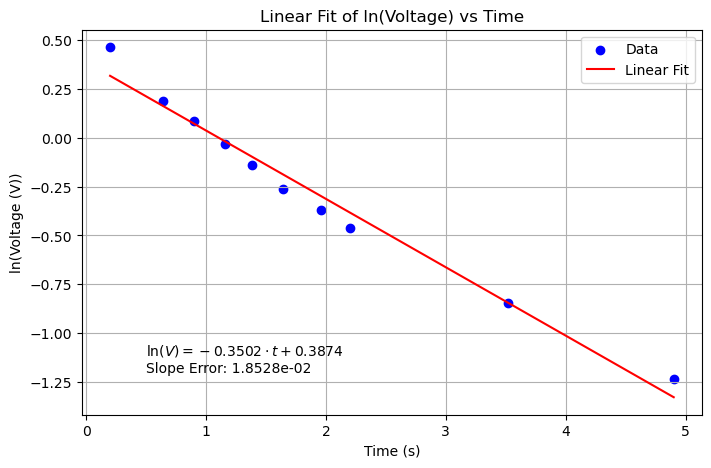

0.00028552768150440547

In [16]:
df["Time (s)"] = df["Time Difference (ms)"] / 1000
df["ln(Voltage)"] = np.log(df["End Voltage (V)"])

# Perform linear regression to get slope, intercept, and their standard errors
slope, intercept, r_value, p_value, std_err = linregress(df["Time (s)"], df["ln(Voltage)"])

# Calculate capacitance using the slope
R = 10 * 10**3  # 10 kOhms in Ohms
C_from_slope = -1 / (R * slope)

# Display the plot with equation and errors
plt.figure(figsize=(8, 5))
plt.scatter(df["Time (s)"], df["ln(Voltage)"], label="Data", color="blue")
plt.plot(df["Time (s)"], slope * df["Time (s)"] + intercept, label="Linear Fit", color="red")

# Adding equation with slope and intercept errors to the plot
equation_text = f"$\ln(V) = {slope:.4f} \cdot t + {intercept:.4f}$\nSlope Error: {std_err:.4e}"
plt.text(0.5, -1.2, equation_text, fontsize=10, color="black")
plt.xlabel("Time (s)")
plt.ylabel("ln(Voltage (V))")
plt.title("Linear Fit of ln(Voltage) vs Time")
plt.legend()
plt.grid(True)
plt.show()

C_from_slope

## Calculating Capacitance

In [18]:

R = 10 * 10**3  # 10 kOhms in Ohms
C_from_slope = -1 / (R * slope)

C_from_slope

0.00028552768150440547